In [1]:
%pylab inline
import scipy.special

Populating the interactive namespace from numpy and matplotlib


In [10]:
class ratmoving:
    
    def __init__(self,n,L):
        self.n=n #linear dimension
        self.L=L #lenght of the grid
        self.N=n*n
        self.sigma=1*float(L/n)
        self.c=1*float(L/n)*5 #cutoff
        self.grid=zeros((pow(n,2),2))
        self.J=zeros((n*n,n*n))
        self.hebbJ=zeros((n*n,n*n))
        self.V=zeros(n*n)
    
    
    def ambient(self,l):#n=square root of number of neurons, l=randomness ,L dimension
        for i in range(self.n):
            for j in range(self.n):
                self.grid[self.n*i+j][0]=random.uniform(float(self.L)/float(self.n)*(i),float(self.L)/float(self.n)*(i+l))
                self.grid[self.n*i+j][1]=random.uniform(float(self.L)/float(self.n)*(j),float(self.L)/float(self.n)*(j+l))
        return         
    
    def computeV(self,currentposition):
        for i in range(self.N):
                self.V[i]=kernel(self.grid[i],currentposition,self.sigma,rat.c)
    
    def strenght(self,currentposition,eta):
        deltaJ=zeros((self.N,self.N))
        for i in range(self.N):
            for j in range(self.N):
                if j!=i:
                    deltaJ[i][j]=eta*(self.V[i])*(self.V[j])
                else:
                    deltaJ[i][j]=0
                    
        for i in range(self.N):
            for j in range(self.N):
                self.J[i][j]=self.J[i][j]+deltaJ[i][j]
        #a=sum(self.J)
        #self.J=self.J/a
        self.J=self.J/norm(self.J)
            
    def learn(self,path,eta,A):
        et=eta
        t=path.shape[0]
        m=zeros(t)
        for s in range(t):
            self.computeV(path[s])
            self.strenght(path[s],et/pow(s+1,0.3))
            m[s]=overlap(self.J,A)
            if s%100==0:
                print(s)
        plot(np.arange(t),m)
        xlabel('t')
        ylabel('overlap')
        show()
        return m
           
            
    
    def zerostrenght(self):
        for i in range(self.N):
            for j in range(self.N):
                self.J[i][j]=random.randint(0,10,size=1)
        #a=sum(self.J)
        #self.J=self.J/a
        self.J=self.J/norm(self.J)
       
        
    def hebbstrenght(self):
        for i in range(self.N):
            for j in range(self.N):
                self.hebbJ[i][j]=kernel(self.grid[i],self.grid[j],self.sigma,self.c)
        #a=sum(self.hebbJ)
        #self.hebbJ=self.hebbJ/a
        self.hebbJ=self.hebbJ/norm(self.hebbJ)
        

    def random_trajectory(self,t):#x=storage position vector, t=time steps
        x=zeros((t,2))
        col=arange(t)
        x[0][0]=random.uniform(0,self.L)
        x[0][1]=random.uniform(0,self.L)
        #x[0][0]=0.1
        #x[0][1]=0.1
        theta=zeros(t)
        theta[0]=random.uniform(0,2*pi)
        
        for i in range(1,t):
            x[i][0]=x[i-1][0]+0.5*(self.L/float(self.n))*cos(theta[i-1])
            x[i][1]=x[i-1][1]+0.5*(self.L/float(self.n))*sin(theta[i-1])
            theta[i]=random.normal(theta[i-1],pi/2,1)    
            
            if logical_or(x[i][0]>self.L,x[i][0]<0):
                theta[i-1]=pi-theta[i-1]
                x[i][0]=x[i-1][0]+0.5*(self.L/float(self.n))*cos(theta[i-1])
            if logical_or(x[i][1]>self.L,x[i][1]<0):
                theta[i-1]=-theta[i-1]
                x[i][1]=x[i-1][1]+0.5*(self.L/float(self.n))*sin(theta[i-1])
        #scatter(x.T[0],x.T[1],c=col,cmap=cm.jet)        
        return x   
            
        #suggerimento per sviluppi futuri:moto ordinato se probabilità di tirare +1 è 1 e le altre zero, compatibilmente con valore di posizione.
        
        
    def ordered_trajectory(self,t):
        x[0][0]=random.randint(0,self.N)
        x[0][1]=random.randint(0,self.N)
        while (x[i][0]==self.n and i<t):
            x[i+1][0]=x[i][0]+random.choice([-1,0,1],size=1,p=[1/3,1/3,1/3])
            x[i+1][1]=x[i][1]
            
    def sample_regular_grid(self,epochs):
        x=[]
        pos=np.zeros((self.N,2))
        for i in range(self.n):
            for j in range(self.n):
                pos[self.n*i+j][0]=i*(self.L/float(self.n))
                pos[self.n*i+j][1]=j*(self.L/float(self.n))
        for e in range(epochs):
            np.random.shuffle(pos)
            x.append(pos)
        return np.asarray(x).reshape((self.N*epochs,2))
    
   
        
    

In [28]:
def kernel(r_i,r_r,sig,c):#r_i=position on the grid,r_r=rat position,sig=standard deviation,c=cutoff
        V=0.0  
        dx=0
        dy=0
        d=0
        dx=abs(r_i[0]-r_r[0])
        dy=abs(r_i[1]-r_r[1])
        d=sqrt(pow(dx,2)+pow(dy,2))
        if d<=c:
            #V=sqrt(2/(pi*pow(sig,2)))*float(1/erf(float(c)/sqrt(2*pow(sig,2))))*exp(-0.5*pow(d/sig,2))
            V=exp(-0.5*pow(d/sig,2))
        else:
            V=0    
        return V
    
def overlap(matA,matB):
    m=0
    for i in range(matA.shape[0]):
        for j in range(matA.shape[0]):
                m=m+matA[i][j]*matB[i][j]
    m=m/float(norm(matA)*norm(matB))
    return m

def distance(r_1,r_2):
    dx=0
    dy=0
    d=0
    dx=abs(r_1[0]-r_2[0])
    dy=abs(r_1[1]-r_2[1])
    d=sqrt(pow(dx,2)+pow(dy,2))
    return d

def J_txt(A,l,eta,epochs): #prints J in a .txt reporting the trajectory,learning rate and epochs of the learning
    B=matrix(A)
    name_of_file="J("+str(l)+","+str(eta)+","+str(epochs)+")"
    file=open(name_of_file + ".txt","w+")
    for line in B:
        savetxt(file,line,fmt='%.2f')
    file.close()  

In [4]:
rat=ratmoving(20,100)
rat.ambient(0)

In [5]:
rat.hebbstrenght()
rat.zerostrenght()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

133000
133100
133200
133300
133400
133500
133600
133700
133800
133900
134000
134100
134200
134300
134400
134500
134600
134700
134800
134900
135000
135100
135200
135300
135400
135500
135600
135700
135800
135900
136000
136100
136200
136300
136400
136500
136600
136700
136800
136900
137000
137100
137200
137300
137400
137500
137600
137700
137800
137900
138000
138100
138200
138300
138400
138500
138600
138700
138800
138900
139000
139100
139200
139300
139400
139500
139600
139700
139800
139900
140000
140100
140200
140300
140400
140500
140600
140700
140800
140900
141000
141100
141200
141300
141400
141500
141600
141700
141800
141900
142000
142100
142200
142300
142400
142500
142600
142700
142800
142900
143000
143100
143200
143300
143400
143500
143600
143700
143800
143900
144000
144100
144200
144300
144400
144500
144600
144700
144800
144900
145000
145100
145200
145300
145400
145500
145600
145700
145800
145900
146000
146100
146200
146300
146400
146500
146600
146700
146800
146900
147000
147100
147200

250100
250200
250300
250400
250500
250600
250700
250800
250900
251000
251100
251200
251300
251400
251500
251600
251700
251800
251900
252000
252100
252200
252300
252400
252500
252600
252700
252800
252900
253000
253100
253200
253300
253400
253500
253600
253700
253800
253900
254000
254100
254200
254300
254400
254500
254600
254700
254800
254900
255000
255100
255200
255300
255400
255500
255600
255700
255800
255900
256000
256100
256200
256300
256400
256500
256600
256700
256800
256900
257000
257100
257200
257300
257400
257500
257600
257700
257800
257900
258000
258100
258200
258300
258400
258500
258600
258700
258800
258900
259000
259100
259200
259300
259400
259500
259600
259700
259800
259900
260000
260100
260200
260300
260400
260500
260600
260700
260800
260900
261000
261100
261200
261300
261400
261500
261600
261700
261800
261900
262000
262100
262200
262300
262400
262500
262600
262700
262800
262900
263000
263100
263200
263300
263400
263500
263600
263700
263800
263900
264000
264100
264200
264300

367200
367300
367400
367500
367600
367700
367800
367900
368000
368100
368200
368300
368400
368500
368600
368700
368800
368900
369000
369100
369200
369300
369400
369500
369600
369700
369800
369900
370000
370100
370200
370300
370400
370500
370600
370700
370800
370900
371000
371100
371200
371300
371400
371500
371600
371700
371800
371900
372000
372100
372200
372300
372400
372500
372600
372700
372800
372900
373000
373100
373200
373300
373400
373500
373600
373700
373800
373900
374000
374100
374200
374300
374400
374500
374600
374700
374800
374900
375000
375100
375200
375300
375400
375500
375600
375700
375800
375900
376000
376100
376200
376300
376400
376500
376600
376700
376800
376900
377000
377100
377200
377300
377400
377500
377600
377700
377800
377900
378000
378100
378200
378300
378400
378500
378600
378700
378800
378900
379000
379100
379200
379300
379400
379500
379600
379700
379800
379900
380000
380100
380200
380300
380400
380500
380600
380700
380800
380900
381000
381100
381200
381300
381400

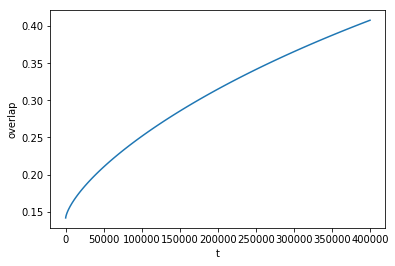

array([0.14147038, 0.14149289, 0.14151291, ..., 0.40797157, 0.40797199,
       0.40797242])

In [6]:
x=rat.sample_regular_grid(1000)
rat.learn(x,0.0001,rat.hebbJ)

In [29]:
J_txt(rat.J,"srg",0.0001,1000)